# Моделирование распространения червей в больших сетях
# Введение
Это реализация представляющая топологию различных графов для моделирования скорости заражения червями в компьютерных сетях. Для создания различных графов и итерации по соседним, я использовал Networkx python. Также для построения графиков и диаграмм результатов экспериментов использовались pandas и matplotlib


In [1]:
import csv
import random
import networkx as nx
import math as mth
import matplotlib.pyplot as plt
from IPython.display import Image
from pandas import DataFrame
from collections import Counter
from itertools import chain
from networkx.classes.function import set_node_attributes, neighbors, all_neighbors
# from networkx.classes.function import 

# Архитектура графов
Архитектура графов относится к топологии сети. Математики и соответствующие ученые тщательно изучают топологию графов, в результате чего появились хорошо разработанные алгоритмы генерации графов. Все графы в следующем эксперименте будут неориентированными, невзвешенными, связными графами. Мы можем представить неориентированный граф как 𝐺 =〈𝑉, 𝐸〉, где V представляет собой множество узлов графа, а E - множество ребер, таких, что e<sub>i</sub> = (v<sub>n</sub>, v<sub>n</sub>), где e<sub>i</sub> $\epsilon$ E и и v<sub>n</sub>,v<sub>n</sub> $\epsilon$ V существуют и непосредственно связаны. Три основных алгоритма, используемых для генерации наших графов, - это модель Эрдёса-Реньи, Барабаси-Альберта и Уоттса-Строгатца. Каждый из этих алгоритмов вводит новые настраиваемые параметры в наш эксперимент. Поскольку наша цель - смоделировать известные инфекционные явления в различных топологиях графов, я буду держать некоторые из этих дополнительных параметров в качестве констант, чтобы устранить ненужную дисперсию.

## Модель Эрдёша-Реньи
Модель Эрдёша-Реньи полезна для генерации случайных графов или эволюции случайных сетей. Модель Эрдёша-Реньи получила свое название от двух венгерских математиков Пола Эрдёша и Альфреда Реньи, которые впервые представили ее в 1959 году. Графы, построенные по этой модели, обладают тем свойством, что все графы на фиксированной вершине с фиксированным числом ребер равновероятны. Для генерации графов по этой модели используются два основных параметра, n (int), соответствующий количеству вершин, и p (float), соответствующий вероятности создания ребер. Чтобы убедиться, что наш граф полностью связный, используйте p = ln(n)/n.

## Модель Барабаши-Альберта
Модель Барабаши-Альберта была использована для создания безмасштабных сетей. Безмасштабная сеть - это сеть, степень которой асимптотически подчиняется степенному закону. Изучение таких сетей актуально для всемирной паутины, социальных сетей и некоторых белковых взаимодействий. Алгоритм назван в честь его изобретателей Альберта-Ласло Барабаши и Реки Альберт. В графе обычно имеется множество узлов-«хабов», которые соединяются с множеством различных узлов. Для создания графов с этой моделью используются два параметра: n (int) - количество узлов и m (int) - количество ребер, которые нужно присоединить от нового узла к существующему. В следующих экспериментах n варьируется, а m остается постоянным.

## Модель Уоттса-Строгаца
Модель Уоттса-Строгатца полезна для генерации случайных графов, подобно модели Эрдёса-Реньи. Однако модель Уоттса-Строгатца создает графы с уникальными свойствами, касающимися средней длины пути и высокой кластеризации. Модель Уоттса-Строгатца достигает этого путем создания так называемых свойств малого мира для графа. Сеть с малым миром - это сеть, в которой расстояние между любыми двумя узлами, определяемое количеством шагов или соседей между двумя узлами, растет пропорционально log(n), где n - количество узлов в сети. Модель была предложена Дунканом Дж. Уоттсом и Стивеном Строгатцем в 1998 году в их статье [Nature paper] (http://worrydream.com/refs/Watts-CollectiveDynamicsOfSmallWorldNetworks.pdf). Для генерации графов по этой модели мы используем три параметра. Первый параметр, n (int), - это количество узлов в графе. Второй параметр k (int) соответствует соединению каждого узла с его k ближайшим соседом в кольцевой топологии. Третий параметр, p (float), указывает на вероятность пересоединения каждого ребра. В следующих экспериментах k и p будут постоянными, в то время как мы будем варьировать количество узлов.


# Чтение CSV в граф networkx
Приведенная ниже программа - это вспомогательная функция, используемая для заражения. 
Функция считывает CSV-файл в неориентированный граф Networkx таким образом, что каждая пара, разделенная запятыми, представляет собой ребро графа. 

Если вы захотите протестировать это, сделайте вызов функции, передав имя CSV-файла, который вы хотите считать в граф. Для удобства я привел два примера CSV-файлов в этом каталоге.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (1, 2), (2, 3), (2, 4), (2, 5), (4, 8), (4, 9), (5, 6), (5, 7)]


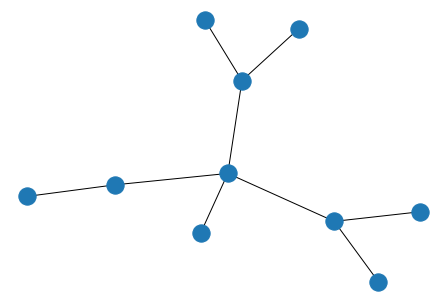

In [2]:
def read_network_from_csv(csvname):
    Graph = nx.Graph()
    with open(csvname,'rt') as f:
        for i in f:
            li = i.strip().split(',')
            Graph.add_edge(int(li[0]),int(li[1]))
    set_node_attributes(Graph, 'uninfected', 'status')
    return Graph

# These line are for demonstration
test_graph = read_network_from_csv('Test.csv')
print(test_graph.nodes)
print(test_graph.edges)
nx.draw(test_graph)

# Программа заражения
Получив на вход CSV-файл, вероятность заражения и начальный вектор заражения, программа заражения моделирует количество новых зараженных узлов в графе, смоделированном в CSV, за каждый такт или раунд. Каждый раунд программа определяет незараженный узел, примыкающий к одному из зараженных узлов (я буду называть его соседом). Затем программа перебирает список соседей зараженного узла и выбирает соседей для заражения с вероятностью 𝑝. Если выбранный сосед уже заражен, он не заражается. Когда все соседи проверены (независимо от того, заражены узлы или нет), один раунд завершен. Один такой раунд считается одной единицей времени для моделирования. Программа работает до тех пор, пока все узлы не будут заражены. Затем возвращается список зараженных узлов за раунд в дополнение к среднему уровню заражения.


In [3]:
def program_one(CSV, infection_probability, initial_node):
    G = read_network_from_csv(CSV)
    clock = 0
    G.nodes[initial_node]['status'] = 'infected'
    infected_nodes = [initial_node]
    lst_of_infected_per_roun = []
    while len(infected_nodes) < len(G):
        newly_infected = []
        for infected_node in infected_nodes:
            for neighbor in G.neighbors(infected_node):
                chance =random.choices([True,False], weights=[infection_probability, 1-infection_probability])
                if (G.nodes[neighbor]['status'] == 'uninfected') and (chance[0]) and (G.nodes[neighbor]['status'] != 'sanitized'):
                    G.nodes[neighbor]['status'] = 'infected'
                    newly_infected.append(neighbor)
        if len(newly_infected) != 0:
            infected_nodes+=newly_infected
        lst_of_infected_per_roun.append(len(newly_infected))
        clock +=1
    average_infection_rate = len(infected_nodes)/clock
    return lst_of_infected_per_roun
    

# Изменения
Здесь я модифицировал программу, чтобы она принимала предварительно построенный граф вместо CSV, чтобы облегчить генерацию графа в библиотеке networkx.


In [4]:
def program_one_modified(G, infection_probability, initial_node):
    clock = 0
    G.nodes[initial_node]['status'] = 'infected'
    infected_nodes = [initial_node]
    lst_of_infected_per_roun = [1]
    while len(infected_nodes) < len(G):
        newly_infected = []
        for infected_node in infected_nodes:
            for neighbor in G.neighbors(infected_node):
                chance =random.choices([True,False], weights=[infection_probability, 1-infection_probability])
                if (G.nodes[neighbor]['status'] == 'uninfected') and (chance[0]) and (G.nodes[neighbor]['status'] != 'sanitized'):
                    G.nodes[neighbor]['status'] = 'infected'
                    newly_infected.append(neighbor)
        if len(newly_infected) != 0:
            infected_nodes+=newly_infected
        lst_of_infected_per_roun.append(len(newly_infected))
        clock +=1
    average_infection_rate = len(infected_nodes)/clock
    return lst_of_infected_per_roun, average_infection_rate

# Экспиримент (без лечения)
Следующая программа выполняет тесты на трех ранее описанных архитектурах графов с различными размерами. Размеры тестируемых узлов - 100, 500, 1000, 5000 и 10000. Для каждого измерения строится график зараженных узлов за раунд для каждой архитектуры с помощью matplotlib (известный инструмент визуализации python) на объекте pandas dataframe. Кроме того, фиксируется и выводится на график средняя скорость заражения для каждого измерения. Вероятность заражения поддерживается на постоянном уровне 50 %. <br>

## Информация о параметрах
При построении графа, соответствующего модели Барабаси-Альберта, второй параметр m (int), определяющий количество ребер, присоединяемых от нового узла к существующему, поддерживается постоянным и составляет m=2. <br>

Для построения графа, соответствующего модели Уоттса-Строгатца, второй параметр k (int), соответствующий соединению каждого узла с его k ближайшим соседом в кольцевой топологии, поддерживается постоянным на уровне k=5. Третий параметр, p (float), указывающий на вероятность пересоединения каждого ребра, поддерживается постоянным на уровне p=0,5. <br>

При построении графа, соответствующего модели Эрдёса-Реньи, второй параметр p (float), соответствующий вероятности создания ребра, поддерживается постоянным на уровне p = 0,05. При проведении тестов, в которых p = log(n)/n, были обнаружены краевые случаи, в которых сгенерированный граф не был полностью связным. Поэтому была выбрана безопасная верхняя граница в 0,05.


Running Tests for 250 Node architecture
Running Tests for 500 Node architecture
Running Tests for 1000 Node architecture
Running Tests for 5000 Node architecture
Running Tests for 10000 Node architecture


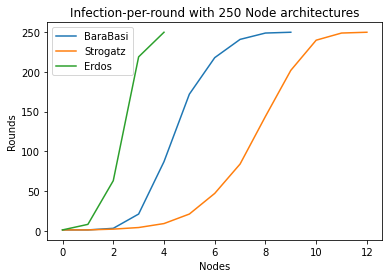

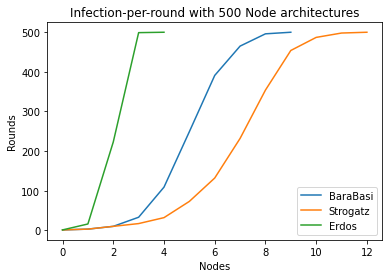

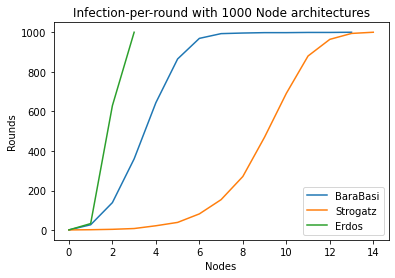

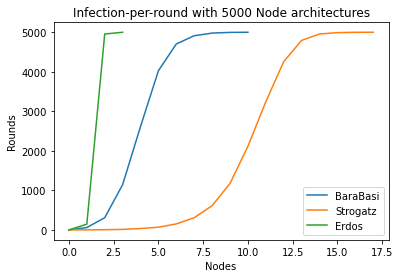

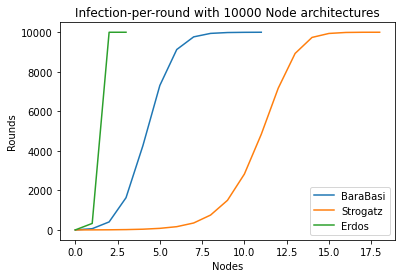

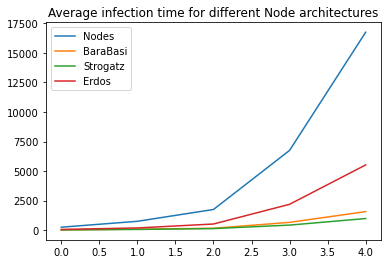

In [72]:
averages = [[250,500,1000,5000,10000],[],[],[]]

for nodes in averages[0]:
    infection_all = []
    print("Running Tests for {} Node architecture".format(nodes))

    
    BaraBasi = nx.barabasi_albert_graph(nodes, 2)
    set_node_attributes(BaraBasi, 'uninfected', 'status')
    BaraBasi_infected_per_round, BaraBasi_average = program_one_modified(BaraBasi, .5, 0)
    infection_all += [BaraBasi_infected_per_round]
    averages[1].append(BaraBasi_average);

    
    Strogatz = nx.connected_watts_strogatz_graph(nodes,5,.5)
    set_node_attributes(Strogatz, 'uninfected', 'status')
    Strogatz_infected_per_round, Strogatz_average = program_one_modified(Strogatz, .5, 0)
    infection_all += [Strogatz_infected_per_round]
    averages[2].append(Strogatz_average);


    ErdosGraph = nx.erdos_renyi_graph(nodes,.06)
    set_node_attributes(ErdosGraph, 'uninfected', 'status')
    Erdos_infected_per_round,Erdos_average = program_one_modified(ErdosGraph, .5, 0)
    infection_all += [Erdos_infected_per_round]
    averages[3].append(Erdos_average);

    df = DataFrame(infection_all).transpose();
    df.columns = ['BaraBasi','Strogatz','Erdos']
    df = df.cumsum();
    ax = df.plot(title = 'Infection-per-round with {} Node architectures'.format(nodes));
    ax.set_xlabel("Nodes")
    ax.set_ylabel("Rounds")
dfaverage = DataFrame(averages).transpose()
dfaverage.columns = ['Nodes','BaraBasi', 'Strogatz','Erdos']
dfaverage = dfaverage.cumsum()
dfaverage.plot(title = 'Average infection time for different Node architectures');


# Результаты (без лечения)
Ниже приводится анализ результатов эксперимента, в ходе которого не было получено лекарство. Исследование касается контекста заданных вопросов. Ниже я сравниваю и сопоставляю результаты работы червя с S-кривой и текущей эпидемией ковида-19. <br>

### a) Проверка гипотезы S-образной кривой
Как видно из приведенных выше графиков количества зараженных узлов с течением времени, наши сети имеют S-образную форму для протестированных моделей из ста, пятисот, тысячи, пяти тысяч и десяти тысяч узлов. Для сравнения, из данных видно, что с увеличением числа узлов скорость заражения резко возрастает для графа, сгенерированного Эрдёсом-Реньи. Если рассмотреть первый график со ста узлами, то для полного заражения графа, сгенерированного моделью Эрдёса-Реньи, потребовалось около четырех раундов. Напротив, в моделях с большим количеством узлов граф, сгенерированный моделью Эрдёса-Реньи, полностью заражает граф менее чем за два раунда. Учитывая, что граф, сгенерированный по модели Эрдёса-Реньи, заражается наиболее активно, мы также видим, что граф Уоттса-Строгатца заражается наименее активно. Во всех архитектурах, кроме архитектуры со ста узлами, графы, сгенерированные Уоттсом-Строгатцем, заражаются дольше всего.

### б) Сходство с текущей пандемией.
Хотя это упражнение моделирует заражение червями через компьютерные сети, есть ценные сравнения с текущей пандемией. Ниже приведен график совокупного числа случаев заболевания по всему миру, предоставленный Всемирной организацией здравоохранения. График совокупного числа подтвержденных случаев также повторяет S-образную кривую. Несмотря на разницу между временными интервалами, можно использовать аналогичную модель с хорошими прогностическими возможностями для прогнозирования глобальной инфекции во времени. Я бы предположил, что, поскольку модель Барабаси-Альберта исторически была хорошей прогностической моделью для социальных сетей, графовая архитектура такого типа создаст более точную модель для пандемии, чем две другие модели.


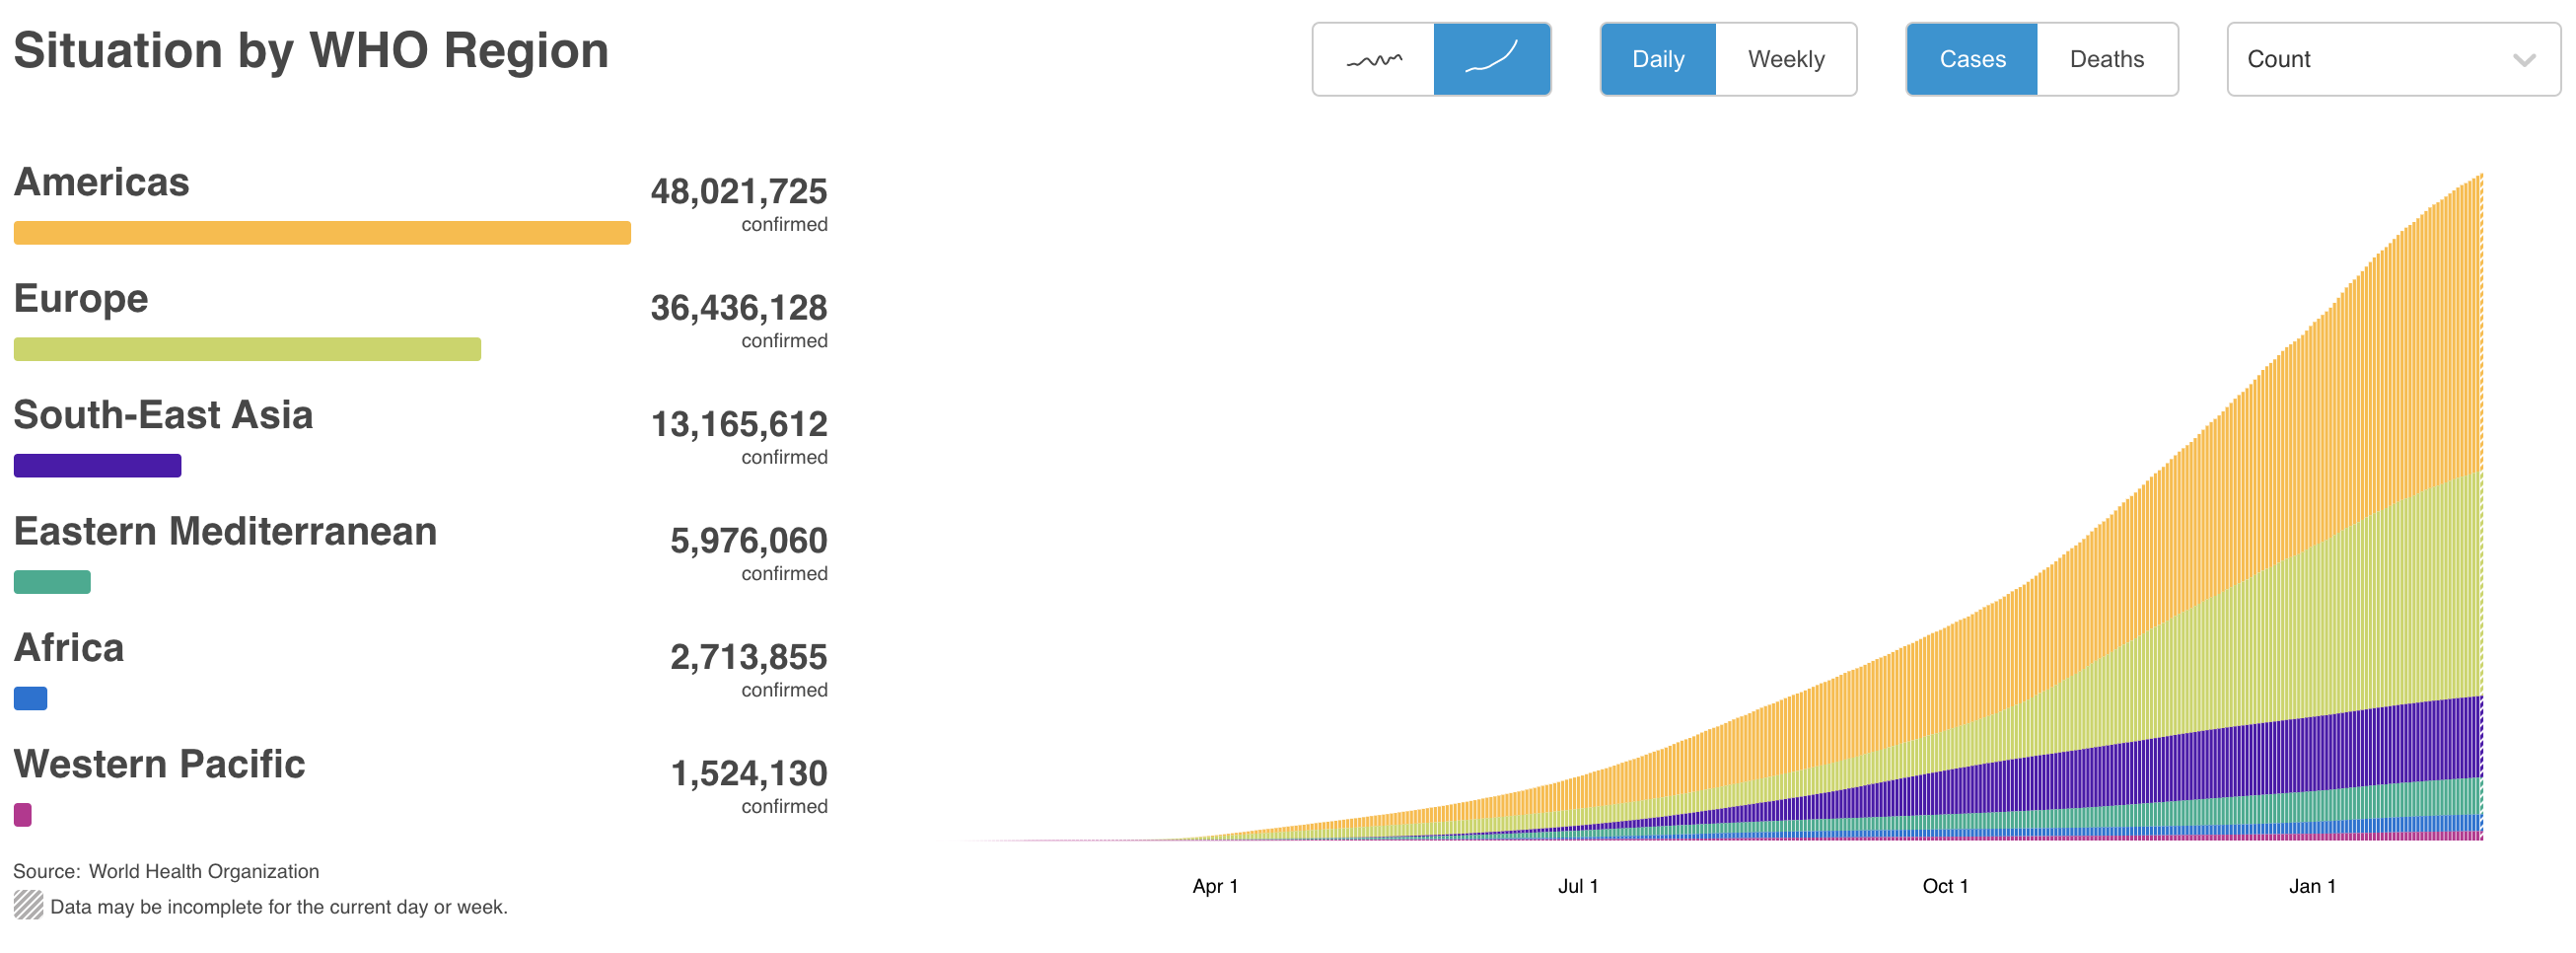

In [5]:
Image(filename='WHOCOVIDDATA.png') 

# Программа для лечения
Программа лечения включает защитный механизм в наше моделирование сети. По мере того как червь распространяется по сети в соответствии с программой 1, одновременно в сети распространяется лекарство, которое либо прививает незараженные узлы, либо лечит зараженные узлы. Инокуляция незараженного узла дает этому узлу иммунитет к червю. Вылечивание зараженного узла устраняет инфекцию и помечает узел как привитый. Используются два дополнительных параметра: вероятность излечения узла и вектор начальной инокуляции для излечения.


In [6]:
def cure_original(CSV, infection_probability, initial_infection_vector, sanitization_probability, 
             initial_sanitization_vector):
    G = read_network_from_csv(CSV)
    counter = 1
    G.nodes[initial_infection_vector]['status'] = 'infected'
    G.nodes[initial_sanitization_vector]['status'] = 'sanitized'
    sanitized_nodes = [initial_sanitization_vector]
    infected_nodes = [initial_infection_vector]
    lst_of_sanitized_per_round = [1]
    lst_of_infected_per_round = [1]
    while len(sanitized_nodes) < len(G):
        newly_sanitized = []
        newly_infected = []
        for sanitized_node in sanitized_nodes:
            for neighbor in G.neighbors(sanitized_node):
                if (random.choices([True,False], weights=[sanitization_probability, 1-sanitization_probability]) and (G.nodes[neighbor]['status'] != 'sanitized')):
                    if (G.nodes[neighbor]['status'] == 'infected'):
                        infected_nodes.remove(neighbor)
                    G.nodes[neighbor]['status'] = 'sanitized'
                    newly_sanitized.append(neighbor)
        for infected_node in infected_nodes:
            for neighbor in G.neighbors(infected_node):
                chance =random.choices([True,False], weights=[infection_probability, 1-infection_probability])
                if (G.nodes[neighbor]['status'] == 'uninfected') and (chance[0]) and (G.nodes[neighbor]['status'] != 'sanitized'):
                    G.nodes[neighbor]['status'] = 'infected'
                    newly_infected.append(neighbor)
        if len(newly_infected) != 0:
            infected_nodes+=newly_infected
        lst_of_infected_per_round.append(len(newly_infected))
        if len(newly_sanitized) != 0:
            sanitized_nodes+=newly_sanitized
        lst_of_sanitized_per_round.append(len(newly_sanitized))
        counter +=1
    average_infection_rate = len(infected_nodes)/counter
    average_sanitizationi_rate = len(sanitized_nodes)/counter
    return lst_of_infected_per_round, lst_of_sanitized_per_round

# Изменения
Здесь я модифицировал программу, чтобы она принимала предварительно построенный граф вместо CSV, чтобы облегчить генерацию графа в библиотеке networkx.


In [10]:
def cure_modified(G, infection_probability, initial_infection_vector, sanitization_probability, 
             initial_sanitization_vector):
    counter = 1
    G.nodes[initial_infection_vector]['status'] = 'infected'
    G.nodes[initial_sanitization_vector]['status'] = 'sanitized'
    sanitized_nodes = [initial_sanitization_vector]
    infected_nodes = [initial_infection_vector]
    lst_of_sanitized_per_round = [1]
    lst_of_infected_per_round = [1]
    while len(sanitized_nodes) < len(G):
        newly_sanitized = []
        newly_infected = []
        for sanitized_node in sanitized_nodes:
            for neighbor in G.neighbors(sanitized_node):
                if (random.choices([True,False], weights=[sanitization_probability, 1-sanitization_probability]) and (G.nodes[neighbor]['status'] != 'sanitized')):
                    if (G.nodes[neighbor]['status'] == 'infected'):
                        infected_nodes.remove(neighbor)
                    G.nodes[neighbor]['status'] = 'sanitized'
                    newly_sanitized.append(neighbor)
        for infected_node in infected_nodes:
            for neighbor in G.neighbors(infected_node):
                chance =random.choices([True,False], weights=[infection_probability, 1-infection_probability])
                if (G.nodes[neighbor]['status'] == 'uninfected') and (chance[0]) and (G.nodes[neighbor]['status'] != 'sanitized'):
                    G.nodes[neighbor]['status'] = 'infected'
                    newly_infected.append(neighbor)
        if len(newly_infected) != 0:
            infected_nodes+=newly_infected
        lst_of_infected_per_round.append(len(newly_infected))
        if len(newly_sanitized) != 0:
            sanitized_nodes+=newly_sanitized
        lst_of_sanitized_per_round.append(len(newly_sanitized))
        counter +=1
    average_infection_rate = len(infected_nodes)/counter
    average_sanitizationi_rate = len(sanitized_nodes)/counter
    return lst_of_infected_per_round, lst_of_sanitized_per_round
#     return infected_nodes, sanitized_nodes

# Экспиримент (с лекарством)
Следующая программа выполняет тесты на трех ранее описанных архитектурах графов. Программа включает лекарство в модель заражения с размерами узлов 100, 500, 1000, 5000 и 10000. Для каждого размера отображается зависимость зараженных узлов за раунд и санированных узлов за раунд от времени. Вероятность заражения и вероятность санации поддерживаются на постоянном уровне 50 %. <br>

## Информация о параметрах
Параметры для генерации графа будут идентичны параметрам предыдущего теста, чтобы сохранить согласованность. Вектор дезинфекции задается как последний узел в графе. Например, если наш граф состоит из 100 узлов, то вектор санирования будет 99-м узлом, а вектор заражения - 0-м<br>.


Running Tests for 100 Node architecture
Running Tests for 500 Node architecture
Running Tests for 1000 Node architecture
Running Tests for 5000 Node architecture
Running Tests for 10000 Node architecture


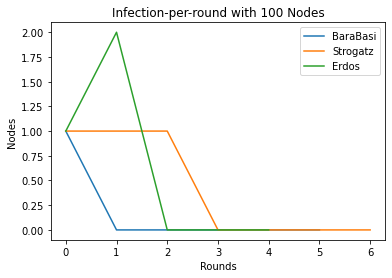

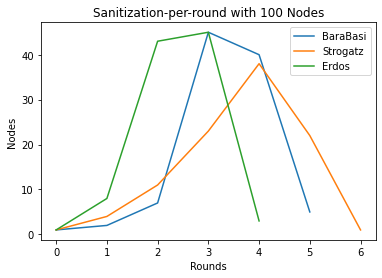

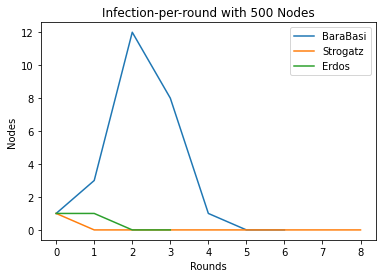

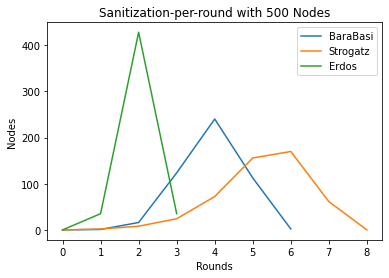

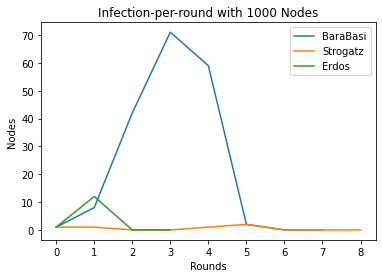

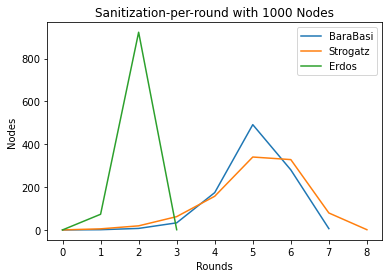

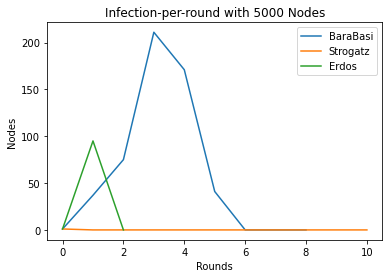

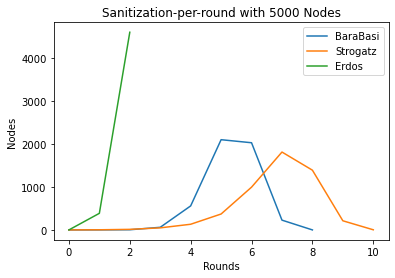

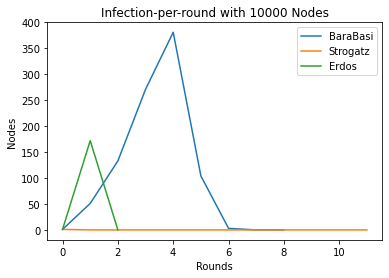

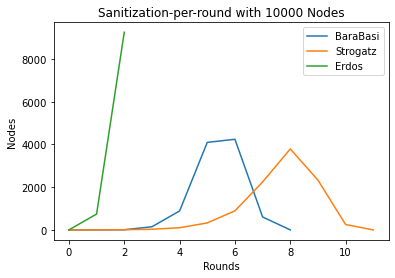

In [11]:
averages = [100,500,1000,5000,10000]

for nodes in averages:
    sanitization_vector = nodes -1
    infection_all = []
    sanitized_all = []
    print("Running Tests for {} Node architecture".format(nodes))

    
    BaraBasi = nx.barabasi_albert_graph(nodes, 2)
    set_node_attributes(BaraBasi, 'uninfected', 'status')
    BaraBasi_infected_per_round, BaraBasi_sanitized_per_round = cure_modified(BaraBasi, .25, 0, .25, sanitization_vector)
    infection_all += [BaraBasi_infected_per_round]
    sanitized_all += [BaraBasi_sanitized_per_round]
    
#     averages[1].append(BaraBasi_sanitized_avg);
#     averages[2].append(BaraBasi_infected_avg);

    Strogatz = nx.connected_watts_strogatz_graph(nodes,5,.5)
    set_node_attributes(Strogatz, 'uninfected', 'status')
    Strogatz_infected_per_round, Strogatz_sanitized_per_round = cure_modified(Strogatz, .25, 0,.25,sanitization_vector)
    infection_all += [Strogatz_infected_per_round]
    sanitized_all += [Strogatz_sanitized_per_round]

#     averages[3].append(Strogatz_sanitized_avg);
#     averages[4].append(Strogatz_infected_avg);

    ErdosGraph = nx.erdos_renyi_graph(nodes,.075)
    set_node_attributes(ErdosGraph, 'uninfected', 'status')
    Erdos_infected_per_round, Erdos_sanitized_per_round = cure_modified(ErdosGraph, .25, 0,.25,sanitization_vector)
    infection_all += [Erdos_infected_per_round]
    sanitized_all += [Erdos_sanitized_per_round]

#     averages[5].append(Erdos_sanitized_avg);
#     averages[6].append(Erdos_infected_avg);

    df = DataFrame(infection_all).transpose();
    df.columns = ['BaraBasi','Strogatz','Erdos']
#     df = df.cumsum();
    ax = df.plot(title = 'Infection-per-round with {} Nodes'.format(nodes));
    ax.set_xlabel("Rounds")
    ax.set_ylabel("Nodes")

    cf = DataFrame(sanitized_all).transpose();
    cf.columns = ['BaraBasi','Strogatz','Erdos']
#     cf = cf.cumsum();
    bx = cf.plot(title = 'Sanitization-per-round with {} Nodes'.format(nodes));
    bx.set_xlabel("Rounds")
    bx.set_ylabel("Nodes")

# dfaverage = DataFrame(averages).transpose()
# dfaverage.columns = ['Nodes','BaraBasi_sanitized_avg','BaraBasi_infected_avg', 
#                      'Strogatz_sanitized_avg','Strogatz_infected_avg','Erdos_sanitized_avg','Erdos_infected_avg']
# dfaverage = dfaverage.cumsum()
# print(dfaverage)
# dfaverage.plot();


# Результаты (с лечением)

## в) Применение лекарства резко влияет на размножение червей
Исходя из предыдущего эксперимента, становится ясно, что лекарство оказывает сильное влияние на модель инфекции. Такое резкое влияние оправдано конструкцией лечения. Зараженный узел имеет возможность вылечиться, но вылеченный узел не может быть заражен. По наблюдениям, наши графики заражения за раунд изменили S-образную форму на кривую Белла. Это изменение результатов соответствует нашим ожиданиям, поскольку по мере того, как все больше узлов будут подвергаться санитарной обработке, количество заражений за раунд будет уменьшаться и в конечном итоге сведется к нулю.

## г) Существует заметная разница между производительностью лечения в сети Erdos
Граф, созданный по модели Эрдёса-Реньи, был заметно более плодовитым, чем графы, созданные по двум другим моделям. Это наблюдение справедливо как для заражения, так и для санации, поэтому, возможно, нет явного преимущества в моделировании наших графов с помощью модели Эрдёса-Реньи. Однако из приведенных выше наблюдений ясно, что заражение за раунд графов, сгенерированных Уоттсом-Строгатцем, значительно ниже по сравнению с санированием за раунд. Граф, сгенерированный по модели Уоттса-Строгатца, также демонстрирует наиболее высокие результаты по излечению по сравнению с графами, сгенерированными по двум другим моделям. В некоторых тестах в сети, сгенерированной Уоттсом-Строгатцем, не было обнаружено ни одного дополнительного заражения, в то время как скорость санации в конечном итоге всегда достигает каждого узла.


## д) Гипотеза N-степени
Чтобы разработать стратегию дальнейшего уменьшения распространения червя при неизменном уровне заражения, мы должны определить узлы графа с наибольшим количеством ребер и назначить вектор начальной дезинфекции одному из этих узлов. В противоположность этому мы могли бы определить узлы графа с наименьшим количеством ребер и назначить вектор начального заражения одному из этих узлов. Таким образом, вероятность санирования за раунд была выше, а вероятность заражения за раунд - ниже.


## Определитель степени
Я написал небольшую программу, которая поможет определить узлы графа с наивысшей и наименьшей степенью. Функция принимает объект графа networkx и возвращает два списка highest_degree_node = (m,n) и lowest_degree_node = (m',n'), где m - узел с наибольшей степенью, а n - степень этого узла. lowest_degree_node, соответственно, имеет ту же нотацию.


([2, 16], [0, 1])


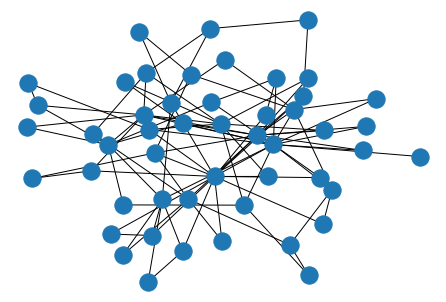

In [19]:

BaraBasi = nx.barabasi_albert_graph(50, 2)
set_node_attributes(BaraBasi, 'uninfected', 'status')
nx.draw(BaraBasi)

def degree_finder(G):
    highest_degree_node = [0,0]
    lowest_degree_node = [0,100]
    for node in G.nodes:
        edge_count=0
        for nieghbors in all_neighbors(G, node):
            edge_count +=1
        if edge_count > highest_degree_node[1]:
            highest_degree_node[0] = node
            highest_degree_node[1] = edge_count
        if edge_count < lowest_degree_node[1]:
            lowest_degree_node[0] = node
            lowest_degree_node[1] = edge_count
    return highest_degree_node, lowest_degree_node
print(degree_finder(BaraBasi))

## Эксперимент по проверке предложенной стратегии по снижению распространения червя
Ниже я провела эксперимент, чтобы проверить наши догадки


Running Tests for 100 Node architecture
Running Tests for 500 Node architecture
Running Tests for 1000 Node architecture
Running Tests for 5000 Node architecture
Running Tests for 10000 Node architecture


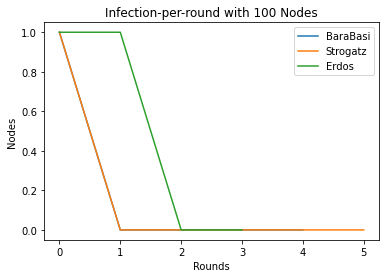

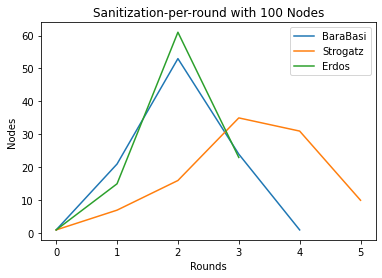

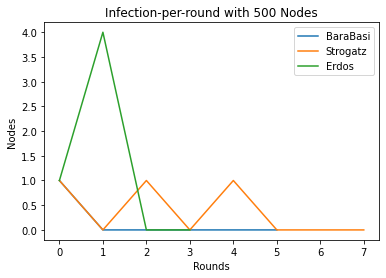

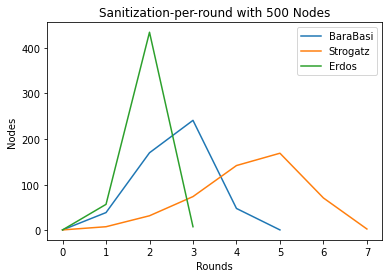

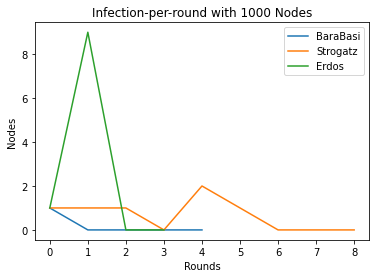

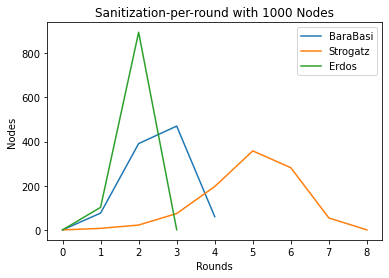

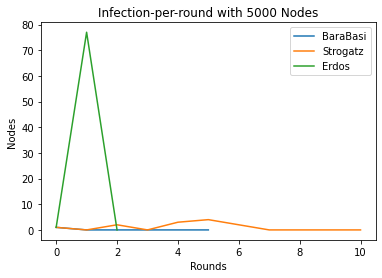

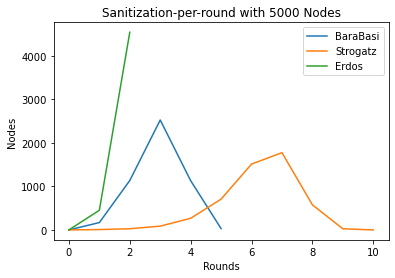

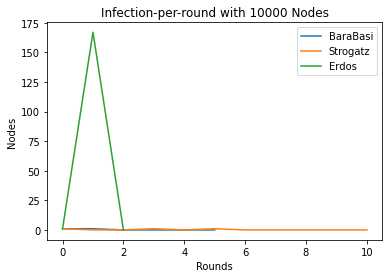

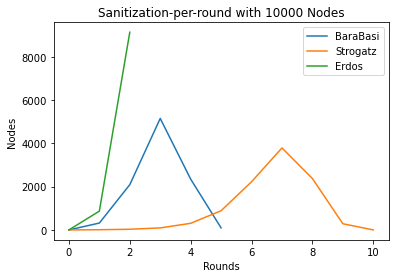

In [20]:
averages = [100,500,1000,5000,10000]

for nodes in averages:
    infection_all = []
    sanitized_all = []
    print("Running Tests for {} Node architecture".format(nodes))

    
    BaraBasi = nx.barabasi_albert_graph(nodes, 2)
    set_node_attributes(BaraBasi, 'uninfected', 'status')
    bara_high, bara_low = degree_finder(BaraBasi)
    BaraBasi_infected_per_round, BaraBasi_sanitized_per_round = cure_modified(BaraBasi, .25, bara_low[0], .25, bara_high[0])
    infection_all += [BaraBasi_infected_per_round]
    sanitized_all += [BaraBasi_sanitized_per_round]

    Strogatz = nx.connected_watts_strogatz_graph(nodes,5,.5)
    set_node_attributes(Strogatz, 'uninfected', 'status')
    strogatz_high, strogatz_low = degree_finder(Strogatz)
    Strogatz_infected_per_round, Strogatz_sanitized_per_round = cure_modified(Strogatz, .25, strogatz_low[0],.25,strogatz_high[0])
    infection_all += [Strogatz_infected_per_round]
    sanitized_all += [Strogatz_sanitized_per_round]

    ErdosGraph = nx.erdos_renyi_graph(nodes,.075)
    set_node_attributes(ErdosGraph, 'uninfected', 'status')
    erdos_high, erdos_low = degree_finder(ErdosGraph)
    Erdos_infected_per_round, Erdos_sanitized_per_round = cure_modified(ErdosGraph, .25, erdos_low[0],.25,erdos_high[0])
    infection_all += [Erdos_infected_per_round]
    sanitized_all += [Erdos_sanitized_per_round]

    df = DataFrame(infection_all).transpose();
    df.columns = ['BaraBasi','Strogatz','Erdos']
    ax = df.plot(title = 'Infection-per-round with {} Nodes'.format(nodes));
    ax.set_xlabel("Rounds")
    ax.set_ylabel("Nodes")

    cf = DataFrame(sanitized_all).transpose();
    cf.columns = ['BaraBasi','Strogatz','Erdos']
    bx = cf.plot(title = 'Sanitization-per-round with {} Nodes'.format(nodes));
    bx.set_xlabel("Rounds")
    bx.set_ylabel("Nodes")

# dfaverage = DataFrame(averages).transpose()
# dfaverage.columns = ['Nodes','BaraBasi_sanitized_avg','BaraBasi_infected_avg', 
#                      'Strogatz_sanitized_avg','Strogatz_infected_avg','Erdos_sanitized_avg','Erdos_infected_avg']
# dfaverage = dfaverage.cumsum()
# print(dfaverage)
# dfaverage.plot();
